In [1]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pandasql import sqldf
import plotly.express as plx

In [2]:

dataset = pd.read_csv("./dataset/student-por.csv",sep=";")
mathset = pd.read_csv("./dataset/student-mat.csv",sep=";")
mathset.head()
dataset["M1"] = mathset["G1"]
dataset["M2"] = mathset["G2"]
dataset["M3"] = mathset["G3"]
dataset["MPaid"] = mathset["paid"]
dataset.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,Walc,health,absences,G1,G2,G3,M1,M2,M3,MPaid
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,1,3,4,0,11,11,5.0,6.0,6.0,no
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,1,3,2,9,11,11,5.0,5.0,6.0,no
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,3,6,12,13,12,7.0,8.0,10.0,yes
3,GP,F,15,U,GT3,T,4,2,health,services,...,1,5,0,14,14,14,15.0,14.0,15.0,yes
4,GP,F,16,U,GT3,T,3,3,other,other,...,2,5,0,11,13,13,6.0,10.0,10.0,yes


In [3]:
def convertToNumeric(column : pd.DataFrame, attributes : list[str]):
    for i in range(column.size):
        for k in range(len(attributes)):
            if attributes[k] == column[i]:
                column[i] = k
                pass
            pass
        pass
    pass

In [4]:
numeric = dataset.copy()
convertToNumeric(numeric["school"], ["GP","MS"])
convertToNumeric(numeric["sex"], ["F","M"])
convertToNumeric(numeric["address"], ["U","R"])
convertToNumeric(numeric["famsize"], ["LE3","GT3"])
convertToNumeric(numeric["Pstatus"], ["A","T"])
convertToNumeric(numeric["Mjob"],["teacher","health","services","at_home","other"])
convertToNumeric(numeric["Fjob"],["teacher","health","services","at_home","other"])
convertToNumeric(numeric["reason"],["home","reputation","course","other"])
convertToNumeric(numeric["guardian"],["mother","father","other"])
numeric.head()


/tmp/ipykernel_7317/3725644536.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column[i] = k


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,Walc,health,absences,G1,G2,G3,M1,M2,M3,MPaid
0,0,0,18,0,1,0,4,4,3,0,...,1,3,4,0,11,11,5.0,6.0,6.0,no
1,0,0,17,0,1,1,1,1,3,4,...,1,3,2,9,11,11,5.0,5.0,6.0,no
2,0,0,15,0,0,1,1,1,3,4,...,3,3,6,12,13,12,7.0,8.0,10.0,yes
3,0,0,15,0,1,1,4,2,1,2,...,1,5,0,14,14,14,15.0,14.0,15.0,yes
4,0,0,16,0,1,1,3,3,4,4,...,2,5,0,11,13,13,6.0,10.0,10.0,yes


(array([423.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 226.]),
 array([0.0, 0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6000000000000001,
        0.7000000000000001, 0.8, 0.9, 1.0], dtype=object),
 <BarContainer object of 10 artists>)

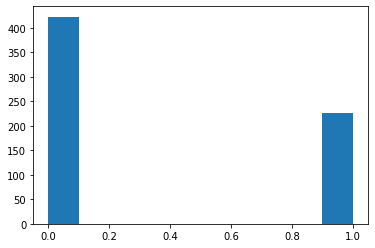

In [5]:
plt.hist(numeric["school"])

(array([112., 177., 179.,   0., 140.,  32.,   0.,   6.,   2.,   1.]),
 array([15. , 15.7, 16.4, 17.1, 17.8, 18.5, 19.2, 19.9, 20.6, 21.3, 22. ]),
 <BarContainer object of 10 artists>)

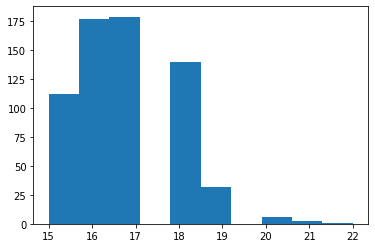

In [28]:
plt.hist(numeric["age"])

(array([[ 0.,  0.,  0.,  5.,  9., 37., 38., 19.,  3.,  1.],
        [ 0.,  0.,  1.,  7., 30., 41., 53., 31., 14.,  0.],
        [ 0.,  0.,  0., 11., 31., 55., 39., 29., 11.,  3.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 1.,  0.,  4., 12., 23., 39., 22., 25., 10.,  4.],
        [ 0.,  0.,  2.,  6., 10., 11.,  2.,  1.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  2.,  3.,  0.,  1.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  2.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.]]),
 array([15. , 15.7, 16.4, 17.1, 17.8, 18.5, 19.2, 19.9, 20.6, 21.3, 22. ]),
 array([ 0. ,  1.9,  3.8,  5.7,  7.6,  9.5, 11.4, 13.3, 15.2, 17.1, 19. ]),
 <matplotlib.collections.QuadMesh at 0x7fecb8526080>)

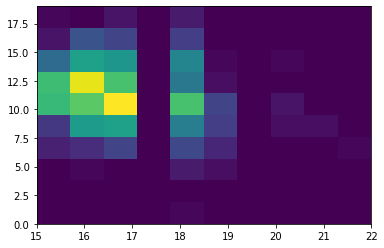

In [6]:
plt.hist2d(numeric["age"],numeric["G1"])